In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [40]:
df = pd.read_csv("C:/Users/tisxo/AI_class/data/AAME.csv")

In [41]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [42]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [43]:
df[df["Open"] == 0]

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
1673,1986-10-28,0.0,10.80,9.60,10.00,8.833040,23100
1674,1986-10-29,0.0,10.40,10.00,10.40,9.186360,15800
1675,1986-10-30,0.0,10.80,10.60,10.60,9.363024,25200
1676,1986-10-31,0.0,11.00,10.60,10.60,9.363024,8600


In [44]:
df = df.dropna()

In [45]:
openValues = df[['Open', 'High', 'Low', 'Close']].copy()
openValues = openValues[openValues['Open'] != 0]
# df에서 Open, High, Low, Close 열만 골라서 새로운 DataFrame openValues를 만드는 코드

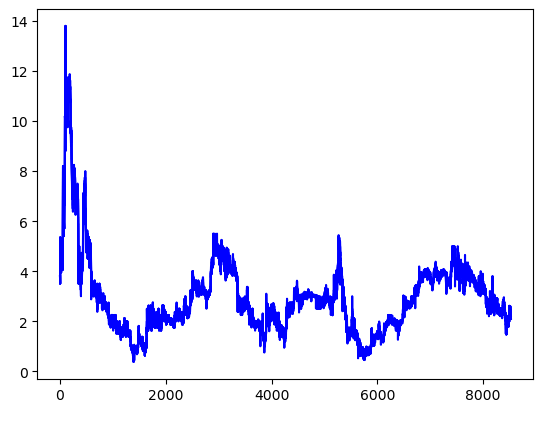

In [46]:
# 시작가만 취한다.
seq_data = (openValues.to_numpy())
# 선형 그래프로 그린다.
plt.plot(seq_data, color='blue')
plt.title("")
plt.xlabel(" ")
plt.xlabel(" ")
plt.show()

In [47]:
df = df.drop(columns=['Adj Close', 'Volume'])

In [48]:
df.head()

,Date,Open,High,Low,Close
0,1980-03-17,0.0,4.05,3.85,3.85
1,1980-03-18,0.0,4.00,3.80,3.80
2,1980-03-19,0.0,4.05,3.85,3.85
3,1980-03-20,0.0,4.00,3.80,3.80
4,1980-03-21,0.0,3.95,3.75,3.75


In [49]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues)

In [50]:
TEST_SIZE = 2000
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [51]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window][-1])
    return np.array(train), np.array(target)
    
window_size = 30         
X_train, y_train = make_sample(train_data, window_size)
X_test,  y_test  = make_sample(test_data,  window_size)

In [57]:
model = Sequential()
model.add(LSTM(64, 
                input_shape=(window_size, 4), 
                activation='tanh', 
                return_sequences=False)
          )
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 64)                  │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.fit(X_train, y_train, epochs = 100, batch_size = 16, validation_data = (X_test, y_test))

Epoch 1/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 8.4903e-04 - val_loss: 7.5062e-05
Epoch 2/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.9980e-04 - val_loss: 7.3170e-05
Epoch 3/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.7577e-04 - val_loss: 2.8838e-04
Epoch 4/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 1.6695e-04 - val_loss: 6.4241e-05
Epoch 5/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 1.9089e-04 - val_loss: 5.8898e-05
Epoch 6/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 1.5524e-04 - val_loss: 6.5014e-05
Epoch 7/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 1.6751e-04 - val_loss: 5.3641e-05
Epoch 8/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 1.4317e-04 - val_loss: 6.2211e-05
Epoch 9/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 1.6781e-04 - val_loss: 5.9396e-05
Epoch 10/100
406/406 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 1.3684e-04 - val_loss: 5.1587e-05
Epoch 11/100
406/406 ━━━━━━━━━━━━━━━━━

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


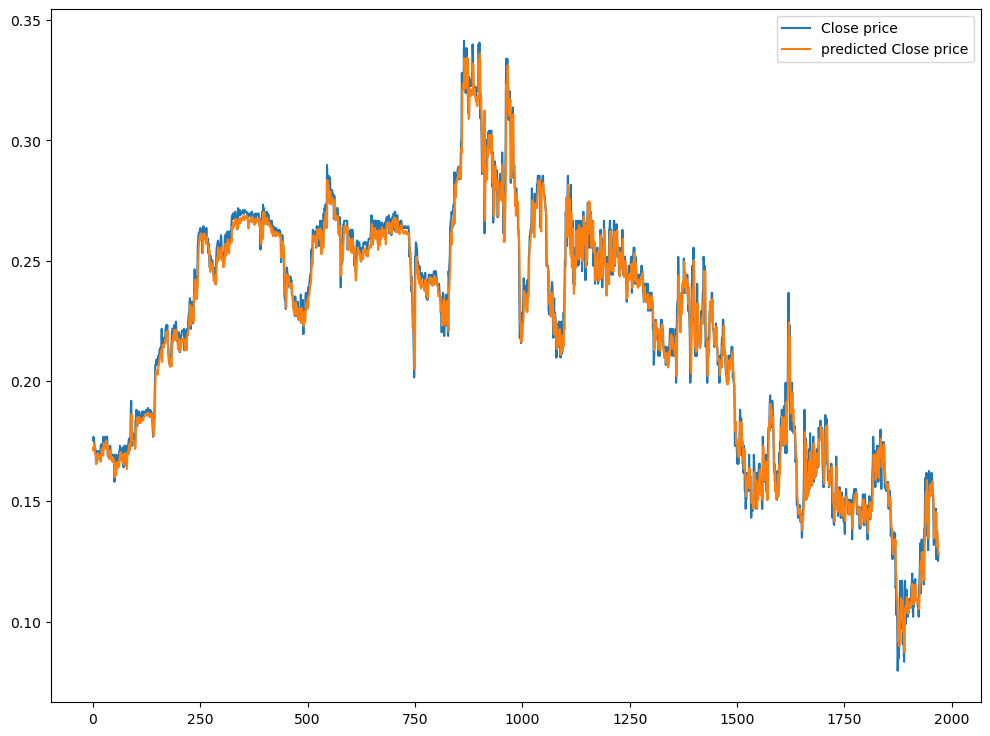

In [61]:
pred = model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='Close price')
plt.plot(pred, label='predicted Close price')
plt.legend()
plt.show()

In [64]:
mse = mean_squared_error(y_test, pred)
print(f"MSE {mse:.6f}")

MSE 0.000052
